In [1]:
import torch

In [1]:
path = "/home/kouyou/ContinualLearning/survey/CIL/logs/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log"


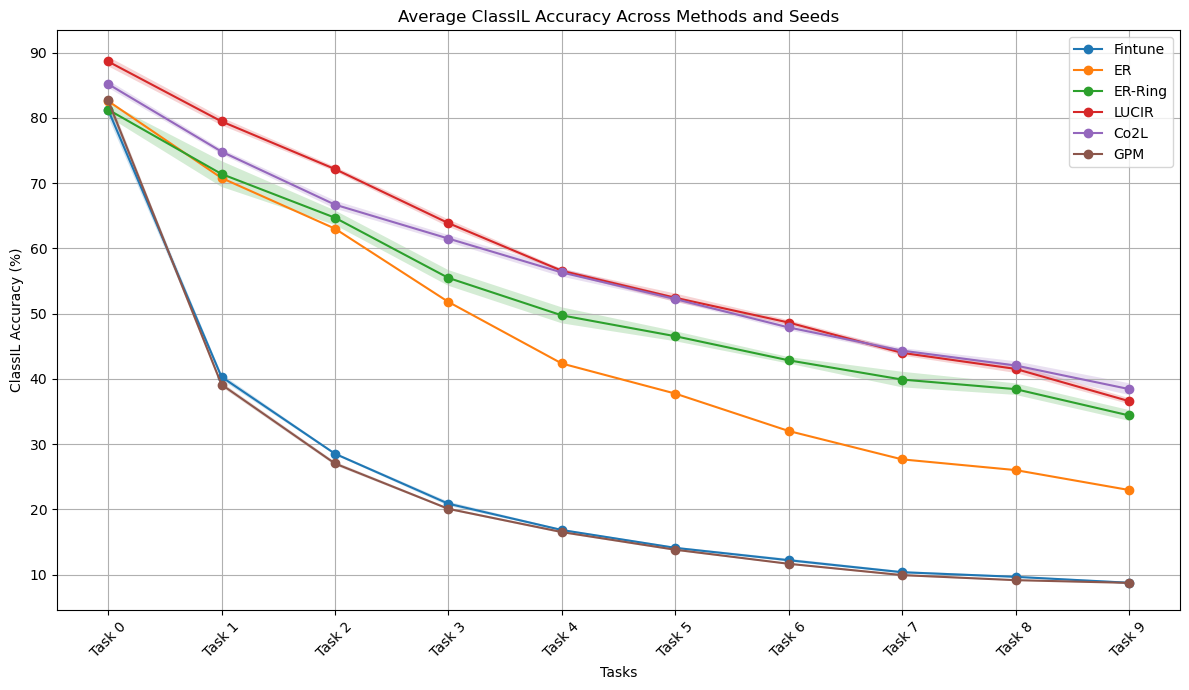

In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義（とりあえずseed値5回変更）
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


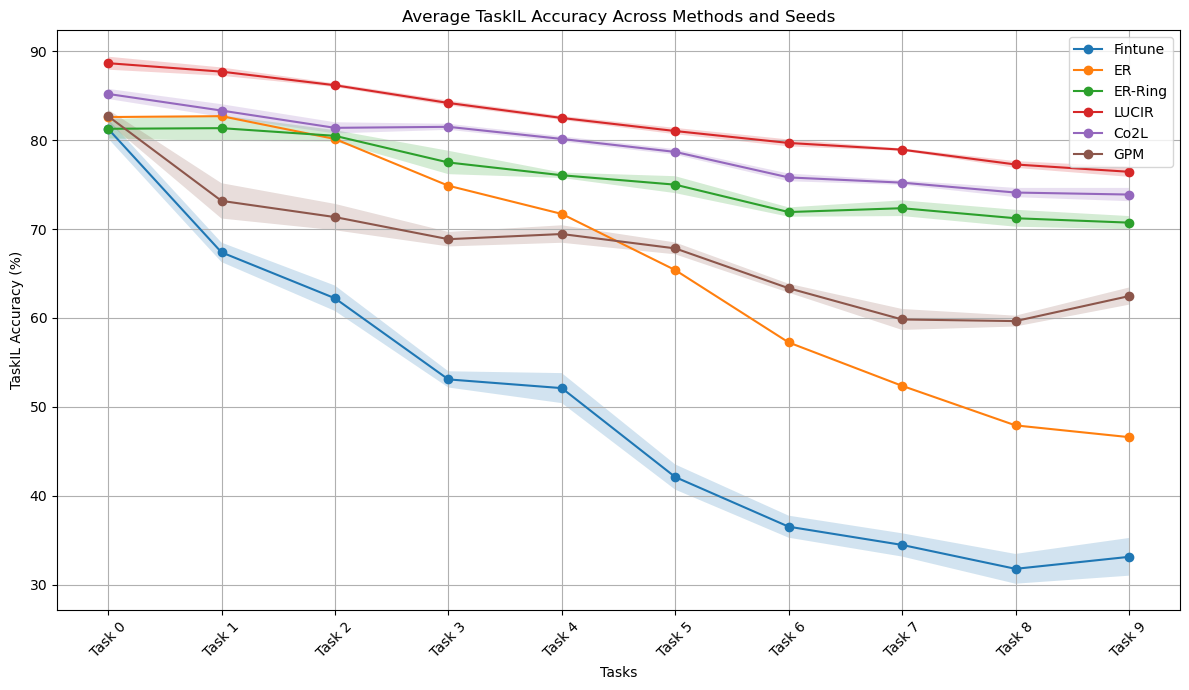

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ]
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        taskil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*TaskIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, taskil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    taskil_acc = float(taskil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        taskil_accuracies.append([])

                    taskil_accuracies[-1].append(taskil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in taskil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average TaskIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('TaskIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


CIFAR10

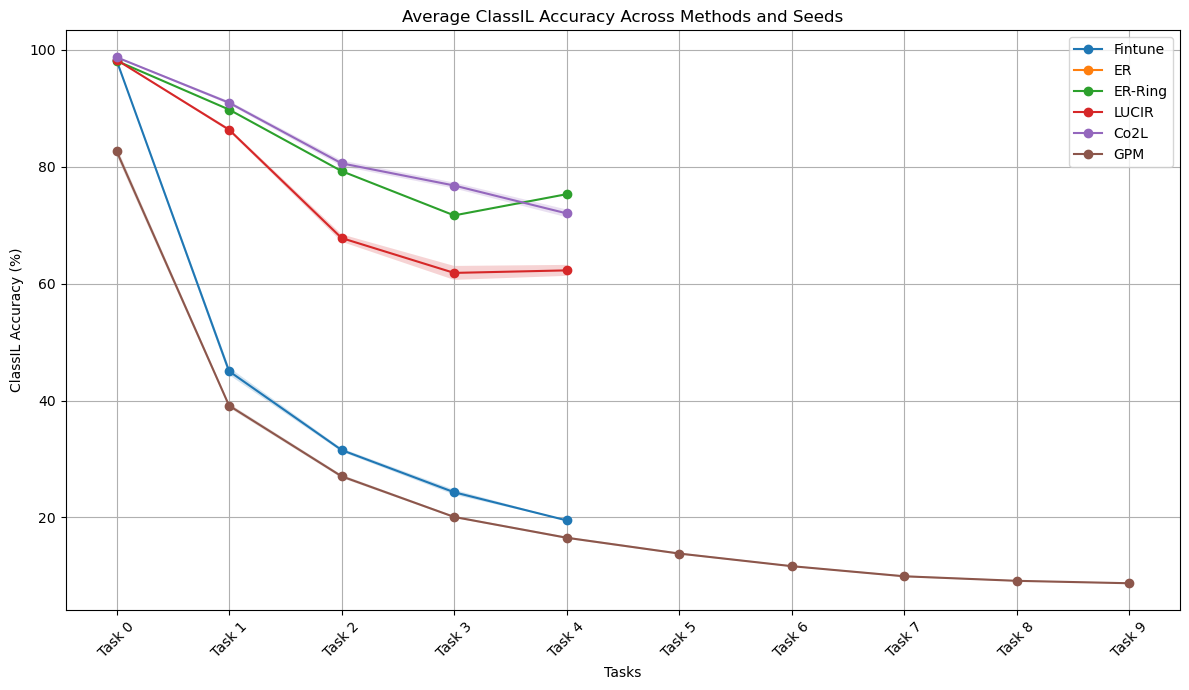

In [3]:
import re
import numpy as np
import matplotlib.pyplot as plt

# 手法ごとにログファイルを定義
method_log_files = {
    'Fintune': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed1_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed2_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed3_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/fintune_er_reservoir0_cifar10_seed4_date2025_04_12/exp_log/experiment.log",
    ],
    'ER': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed1_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed2_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed3_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/er_er_reservoir2000_cifar10_seed4_date2025_04_12/exp_log/experiment.log",
    ],
    'ER-Ring': [
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
        "/home/kouyou/ContinualLearning/survey/CIL/logs/er/erring_er_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log",
    ],
    'LUCIR': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed1_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed2_date2025_04_14/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed3_date2025_04_14/exp_log/experiment.log',
        # '/home/kouyou/ContinualLearning/survey/CIL/logs/lucir/lucir_lucir_herding2000_cifar10_seed0_date2025_04_14/exp_log/experiment.log',
    ],
    'Co2L': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed0_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed1_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed2_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed3_date2025_04_12/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/co2l/co2l_co2l_ring2000_cifar10_seed4_date2025_04_12/exp_log/experiment.log',
    ],
    'GPM': [
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed0_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed1_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed2_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed3_date2025_04_09/exp_log/experiment.log',
        '/home/kouyou/ContinualLearning/survey/CIL/logs/gpm/gpm_gpm_ring0_cifar100_seed4_date2025_04_09/exp_log/experiment.log',
    ],
}

# プロットの準備
plt.figure(figsize=(12, 7))

# 各手法について処理を繰り返す
for method_name, log_files in method_log_files.items():

    all_seed_task_accuracies = []

    for log_file in log_files:
        tasks = []
        classil_accuracies = []

        with open(log_file, 'r') as file:
            for line in file:
                match = re.search(r'task (\d+) Epoch (\d+):.*ClassIL_accuracy=([\d\.]+)', line)
                if match:
                    task_id, epoch, classil_acc = match.groups()
                    task_id, epoch = int(task_id), int(epoch)
                    classil_acc = float(classil_acc)

                    if len(tasks) == 0 or tasks[-1] != task_id:
                        tasks.append(task_id)
                        classil_accuracies.append([])

                    classil_accuracies[-1].append(classil_acc)

        # 各タスク終了時の最終精度を抽出
        final_accuracies = [accs[-1] for accs in classil_accuracies]
        all_seed_task_accuracies.append(final_accuracies)

    # NumPy配列に変換し、シードごとに平均値と標準偏差を計算
    all_seed_task_accuracies = np.array(all_seed_task_accuracies)
    mean_accuracies = np.mean(all_seed_task_accuracies, axis=0)
    std_accuracies = np.std(all_seed_task_accuracies, axis=0)

    # タスクのインデックスを作成
    task_indices = [f'Task {i}' for i in range(len(mean_accuracies))]

    # 各手法の平均精度をプロット
    plt.plot(task_indices, mean_accuracies, marker='o', linestyle='-', label=f'{method_name}')

    # 標準偏差の範囲をプロット
    plt.fill_between(task_indices,
                     mean_accuracies - std_accuracies,
                     mean_accuracies + std_accuracies,
                     alpha=0.2)

# グラフ設定
plt.title('Average ClassIL Accuracy Across Methods and Seeds')
plt.xlabel('Tasks')
plt.ylabel('ClassIL Accuracy (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
